In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
import json

publisherid=10000027998

In [2]:
review_df=pd.DataFrame(columns=["Name", "BizID", "City", "State", "Zip", "ReviewID", "Rating"])
review_df

,Name,BizID,City,State,Zip,ReviewID,Rating


In [3]:
cities = ["Lockhart, TX", "Memphis, TN","Kansas City, MO","Lexington, NC", "Austin, TX", "St. Louis, MO"
          , "Dallas, TX", "Nashville, TN","Atlanta, GA", "Brooklyn, NY"]


x=50
y=0
y1=49

In [4]:
for i in range (0,2):
    
 # NEED TO RESET THE RANGE FOR i ABOVE TO GET MORE RESULTS, LIMITING FOR DEVELOPMENT NOW

    for city in cities:
        print(city)
        query_url = f'https://api.citygridmedia.com/content/reviews/v2/search/where?what=barbeque&where={city}&publisher={publisherid}&format=json&rpp=50&i={i}'
        response = requests.get(query_url).json()
        index=0
        for i,index in zip(range(x),range(y,y1)):
            try:
                review_df.loc[index,"Name"] = response['results']['reviews'][i]['business_name']
                review_df.loc[index,"ReviewID"] =response['results']['reviews'][i]['review_id']
                review_df.loc[index,"Rating"] = response['results']['reviews'][i]['review_rating']
                review_df.loc[index,"BizID"] = response['results']['reviews'][i]['listing_id']
                print(f'{index}')
            except (KeyError,IndexError):
                print("Missing field/result... skipping.")
        y=y+50
        y1=y1+50

Lockhart, TX
0
1
2
3
4
5
6
7
8
9
10
11
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing f

In [5]:
review_df

,Name,BizID,City,State,Zip,ReviewID,Rating
0,Chisholm Trail Bar-B-Q,10192811,NaN,NaN,NaN,ip_10302946967,8
1,Chisholm Trail Bar-B-Q,10192811,NaN,NaN,NaN,ip_9355790545,10
2,Chisholm Trail Bar-B-Q,10192811,NaN,NaN,NaN,ip_10313848476,10
3,Kreuz Market,10192699,NaN,NaN,NaN,gayot_91032be1f6c1a46f4c64a8443c4ff150,None
4,Black's Barbecue,10192700,NaN,NaN,NaN,mism_153833,8
...,...,...,...,...,...,...,...
994,Atomic Wings,682573300,NaN,NaN,NaN,judy_619072771,10
995,Atomic Wings,682573300,NaN,NaN,NaN,judy_662466623,10
996,Atomic Wings,682573300,NaN,NaN,NaN,judy_736796542,10
997,Atomic Wings,682573300,NaN,NaN,NaN,judy_764174782,10


In [6]:
for index, row in review_df.iterrows():
    ListingID=row["BizID"]
    places_url = f'http://api.citygridmedia.com/content/places/v2/detail?id={ListingID}&id_type=cs&client_ip=123.4.56.78&publisher={publisherid}&format=json'
    places_response = requests.get(places_url).json()
    
    try:
        review_df.loc[index,"City"] = places_response['locations'][0]['address']['city']
        review_df.loc[index,"State"]=places_response['locations'][0]['address']['state']
        review_df.loc[index,"Zip"]=places_response['locations'][0]['address']['postal_code']
        print(f'{index}')
    except (KeyError):
        print("Missing field/result... skipping.")
# print(f'business name: {BizName}  biz ID: {ListingID} \nCity: {BizCity}  State: {BizSt}  Zip: {BizZip}\nReviewID: {ReviewID}  Rating: {ReviewRating}'    )
# review_df

0
1
2
3
4
5
6
7
8
9
10
11
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
100
101
102
103
104
105
106
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
250
251
252
253
254
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344

In [7]:
#dropping any data that has NaN
# code from this dataframe
#review_df=review_df.dropna()
#review_df
reviews_df = review_df.dropna()
reviews_df = reviews_df[reviews_df['City'].isin(["Lockhart", "Memphis","Kansas City","Lexington", "Austin", "St. Louis"
          , "Dallas", "Nashville","Atlanta", "Brooklyn"] )]
reviews_df

,Name,BizID,City,State,Zip,ReviewID,Rating
0,Chisholm Trail Bar-B-Q,10192811,Lockhart,TX,78644,ip_10302946967,8
1,Chisholm Trail Bar-B-Q,10192811,Lockhart,TX,78644,ip_9355790545,10
2,Chisholm Trail Bar-B-Q,10192811,Lockhart,TX,78644,ip_10313848476,10
4,Black's Barbecue,10192700,Lockhart,TX,78644,mism_153833,8
6,Kreuz Market,10192699,Lockhart,TX,78644,ip_10303211111,8
...,...,...,...,...,...,...,...
994,Atomic Wings,682573300,Brooklyn,NY,11201,judy_619072771,10
995,Atomic Wings,682573300,Brooklyn,NY,11201,judy_662466623,10
996,Atomic Wings,682573300,Brooklyn,NY,11201,judy_736796542,10
997,Atomic Wings,682573300,Brooklyn,NY,11201,judy_764174782,10


In [8]:
reviews_df.dtypes

Name        object
BizID       object
City        object
State       object
Zip         object
ReviewID    object
Rating      object
dtype: object

In [9]:
reviews_df["Rating"] = reviews_df.Rating.astype(float)

In [10]:
# Uncomment to see a clean print of the json in the places detail response above
#print(json.dumps(places_response, indent=4, sort_keys=True))

In [11]:
#What 10 major cities have the best average overall Ranking for BBQ-Andrea
city_mean = reviews_df.groupby("City")["Rating"].mean()
city_mean.head(10)
#city_mean.describe()

City
Atlanta        6.444444
Austin         7.688889
Brooklyn       9.875000
Dallas         8.045455
Kansas City    8.355556
Lexington      8.551724
Lockhart       8.250000
Memphis        8.176471
Nashville      6.588235
St. Louis      8.000000
Name: Rating, dtype: float64

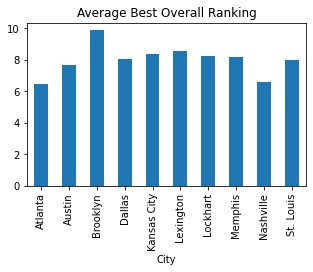

<Figure size 432x288 with 0 Axes>

In [12]:
#MatPlotLib on What 10 major cities have the best overall Ranking for BBQ-Andrea
# Use DataFrame.plot() in order to create a bar chart of the data
city_mean.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Average Best Overall Ranking")

plt.show()
plt.tight_layout()

In [13]:
#City reviews by count-Andrea
#city_count =(review_df.groupby("City")["Rating"]).value_counts()
city_count =reviews_df["City"].value_counts()
city_count.head

<bound method NDFrame.head of Brooklyn       96
Atlanta        90
Kansas City    90
Austin         90
Dallas         88
Memphis        68
Lexington      58
Nashville      34
Lockhart       16
St. Louis       2
Name: City, dtype: int64>

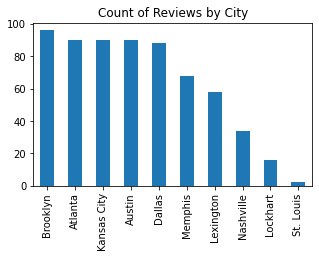

<Figure size 432x288 with 0 Axes>

In [14]:
##MatplotLib reviews by count -Andrea
city_count.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Count of Reviews by City")

plt.show()
plt.tight_layout()

In [15]:

#City with max review rating-Andrea
city_max = reviews_df.groupby("City")["Rating"].max()
city_max.head(10)

City
Atlanta        10.0
Austin         10.0
Brooklyn       10.0
Dallas         10.0
Kansas City    10.0
Lexington      10.0
Lockhart       10.0
Memphis        10.0
Nashville      10.0
St. Louis       8.0
Name: Rating, dtype: float64

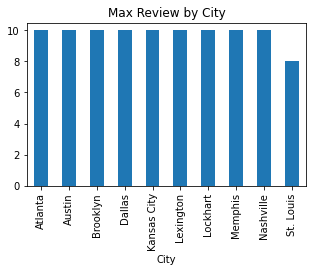

<Figure size 432x288 with 0 Axes>

In [16]:
#MatplotLib on max reviews-Andrea
city_max.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Max Review by City")

plt.show()
plt.tight_layout()

In [17]:
#City with min reviews rating-Andrea
city_min = reviews_df.groupby("City")["Rating"].min()
city_min.head(10)

City
Atlanta        2.0
Austin         2.0
Brooklyn       8.0
Dallas         2.0
Kansas City    2.0
Lexington      2.0
Lockhart       4.0
Memphis        2.0
Nashville      2.0
St. Louis      8.0
Name: Rating, dtype: float64

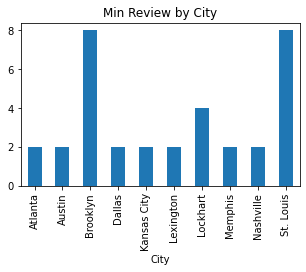

<Figure size 432x288 with 0 Axes>

In [18]:
#MatplotLib on min reviews-Andrea
city_min.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Min Review by City")

plt.show()
plt.tight_layout()

In [19]:
#correlation on ranking and demographics
#Matplotlib correlation on ranking and demographics
census_df = pd.read_csv("CBDataFileExpanded.cs.csv")
census_df

,Unnamed: 0,City,Pop2019,Pop2010,Pop%<5,Pop%<18,Pop%<64,PopFemale,MedValHm,MedRent,...,A&FSales1K,RSales1K,MedHInc,PerCapInc,Poverty%,PopSqMile,LandAreaSqM,FIPSCode,Lat,Lng
0,0,St. Louis,300576,319289,6.4,19.4,13.1,51.6,138700,828,...,1255664,2471933,43896,30542,21.8,5157.5,61.91,"""2965000""",38.627003,-90.199404
1,1,Austin,978908,801829,6.4,20.4,8.9,49.2,337400,1280,...,3474670,14738182,71576,43043,13.2,2653.2,297.90,"""4805000""",30.267153,-97.743061
2,2,Kansas City,495327,459902,6.8,23.1,12.9,51.5,154600,941,...,1630048,7537341,54194,32348,16.1,1459.9,314.95,"""2938000""",39.099727,-94.578567
3,3,Lexington,18933,18944,8.5,24.9,16.4,50.4,104200,704,...,70445,547854,29938,16954,27.0,1053.0,17.98,"""3738060""",35.824027,-80.253384
4,4,Memphis,651073,651873,7.6,25.0,12.8,52.7,101800,901,...,1503947,18848867,41228,25605,25.1,2053.3,315.06,"""4748000""",35.149534,-90.048980
5,5,Lockhart,14133,12690,3.7,21.4,15.4,54.2,141000,977,...,27701,152660,55644,23346,14.6,815.3,15.58,"""4843240""",29.884944,-97.670000
6,6,Brooklyn,8336817,8175031,6.5,20.8,14.5,52.3,606000,1443,...,27452861,92265000,63998,39828,17.9,27012.5,302.64,"""3651000""",40.678178,-73.944158
7,7,Atlanta,506811,427059,5.4,18.3,11.5,51.5,290400,1153,...,3023387,6088296,59948,47424,20.8,3154.3,133.15,"""1304000""",33.748995,-84.387982
8,8,Nashville,670820,603438,6.8,21.0,11.7,51.8,239000,1100,...,2455123,9527759,59828,35243,15.1,1265.4,475.13,"""4752006""",36.162664,-86.781602
9,9,Dallas,1343573,1197658,7.5,25.0,10.3,50.6,188100,1052,...,3851458,16889012,52580,34479,18.9,3517.6,340.52,"""4819000""",32.776664,-96.796988


In [20]:
correlation_df = pd.merge(census_df, city_mean, on="City")
correlation_df.head(10)

,Unnamed: 0,City,Pop2019,Pop2010,Pop%<5,Pop%<18,Pop%<64,PopFemale,MedValHm,MedRent,...,RSales1K,MedHInc,PerCapInc,Poverty%,PopSqMile,LandAreaSqM,FIPSCode,Lat,Lng,Rating
0,0,St. Louis,300576,319289,6.4,19.4,13.1,51.6,138700,828,...,2471933,43896,30542,21.8,5157.5,61.91,"""2965000""",38.627003,-90.199404,8.000000
1,1,Austin,978908,801829,6.4,20.4,8.9,49.2,337400,1280,...,14738182,71576,43043,13.2,2653.2,297.90,"""4805000""",30.267153,-97.743061,7.688889
2,2,Kansas City,495327,459902,6.8,23.1,12.9,51.5,154600,941,...,7537341,54194,32348,16.1,1459.9,314.95,"""2938000""",39.099727,-94.578567,8.355556
3,3,Lexington,18933,18944,8.5,24.9,16.4,50.4,104200,704,...,547854,29938,16954,27.0,1053.0,17.98,"""3738060""",35.824027,-80.253384,8.551724
4,4,Memphis,651073,651873,7.6,25.0,12.8,52.7,101800,901,...,18848867,41228,25605,25.1,2053.3,315.06,"""4748000""",35.149534,-90.048980,8.176471
5,5,Lockhart,14133,12690,3.7,21.4,15.4,54.2,141000,977,...,152660,55644,23346,14.6,815.3,15.58,"""4843240""",29.884944,-97.670000,8.250000
6,6,Brooklyn,8336817,8175031,6.5,20.8,14.5,52.3,606000,1443,...,92265000,63998,39828,17.9,27012.5,302.64,"""3651000""",40.678178,-73.944158,9.875000
7,7,Atlanta,506811,427059,5.4,18.3,11.5,51.5,290400,1153,...,6088296,59948,47424,20.8,3154.3,133.15,"""1304000""",33.748995,-84.387982,6.444444
8,8,Nashville,670820,603438,6.8,21.0,11.7,51.8,239000,1100,...,9527759,59828,35243,15.1,1265.4,475.13,"""4752006""",36.162664,-86.781602,6.588235
9,9,Dallas,1343573,1197658,7.5,25.0,10.3,50.6,188100,1052,...,16889012,52580,34479,18.9,3517.6,340.52,"""4819000""",32.776664,-96.796988,8.045455


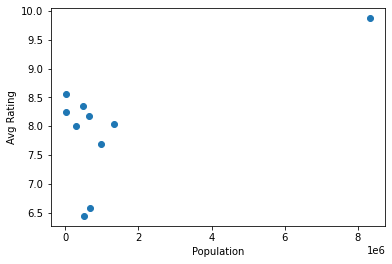

In [21]:
x_values = correlation_df["Pop2019"]
y_values = correlation_df["Rating"]
plt.scatter(x_values,y_values)
plt.xlabel('Population')
plt.ylabel('Avg Rating')
plt.show()

In [32]:
correlation_df1 = correlation_df["Pop2019"] < 8000000
correlation_df1
correlation_df1=correlation_df[(correlation_df['Pop2019']<8000000)]

The r-squared is: 0.05677273846677855


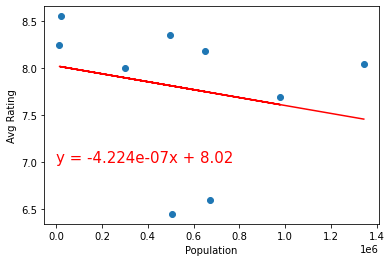

In [44]:
x_values = correlation_df1["Pop2019"]
y_values = correlation_df1["Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,10)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,10000000),xytext=(0,7),fontsize=15,color="red")
plt.annotate(line_eq,(10,8),xytext=(0,7),fontsize=15,color="red")
plt.xlabel('Population')
plt.ylabel('Avg Rating')
print(f"The r-squared is: {rvalue**2}")


plt.show()
